# Example 1

# Regarding Monte Carlo Model

The values of S0, K, T, r and sigma are arbitrarily chosen here. It should be chosen depending on your model and option type.

S0 -- S0 represents the current price of the underlying asset (stock price) at time t=0. If you expect the underlying asset's price to increase, you may benefit from choosing a higher S0. Conversely, if you expect the price to decrease, a lower S0 might be more advantageous.

K -- K represents the strike price of the option. The strike price is the price at which the option can be exercised. If you believe the underlying asset's price will exceed the strike price by a significant margin, choosing a lower K may be advantageous for a call option.

T -- T is the time to expiration of the option. Generally, the longer the time to expiration, the higher the option premium will be, as there is more time for the underlying asset to move in a favorable direction. If you are bullish on the underlying asset and believe it will increase significantly over time, choosing a larger T might be beneficial.

r -- r is the risk-free interest rate. A higher interest rate could lead to higher option prices because the cost of holding the underlying asset is higher. If you expect interest rates to increase, you might benefit from a higher r.

sigma -- sigma represents the volatility of the underlying asset. Higher volatility generally leads to higher option prices, as there is a greater probability of significant price movements. If you anticipate higher volatility in the underlying asset, choosing a larger sigma may be beneficial.

In [117]:
import math
from numpy import *
from time import time

random.seed(20000)
t0 = time()

S0 = 120.; K = 50; T = 2.0; r = 0.1; sigma = 0.4
M = 50; dt = T / M; I = 250000
# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))

S[0] = S0

C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

tnp2 = time() - t0

print('The European Option Value is: ', C0)
print('The Execution Time is: ',tnp2)

The European Option Value is:  80.07963150360463
The Execution Time is:  0.9721477031707764


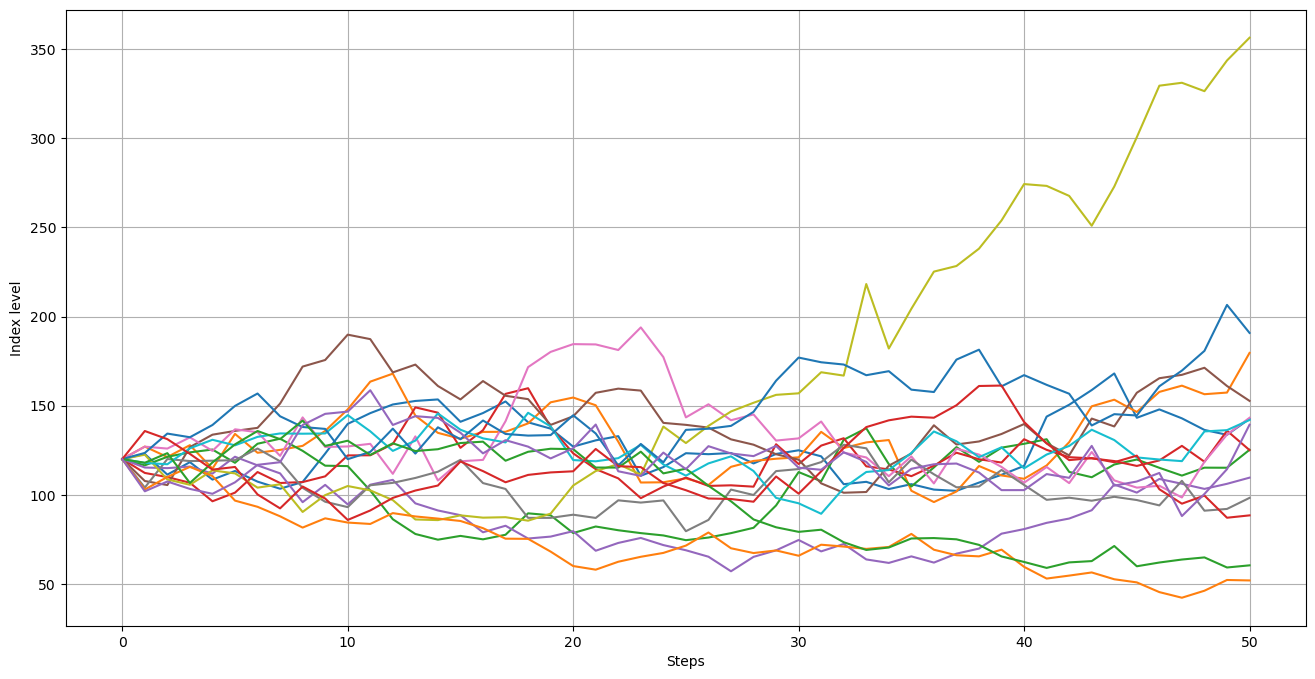

In [118]:
import matplotlib.pyplot as plt
plt.plot(S[:, :15])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.show()

(0.0, 700.0)

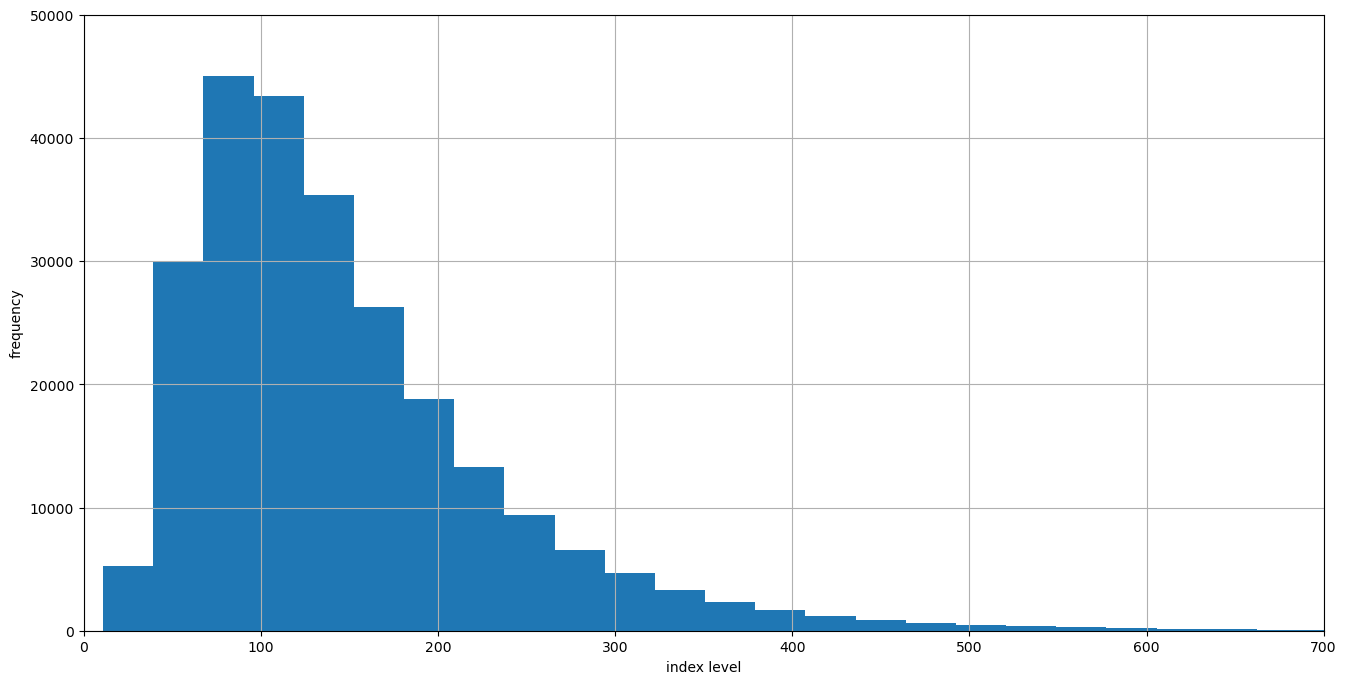

In [119]:
plt.rcParams["figure.figsize"] = (16,8)
plt.hist(S[-1], bins = 60)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.ylim(0, 50000)
plt.xlim(0,700)

(0.0, 80000.0)

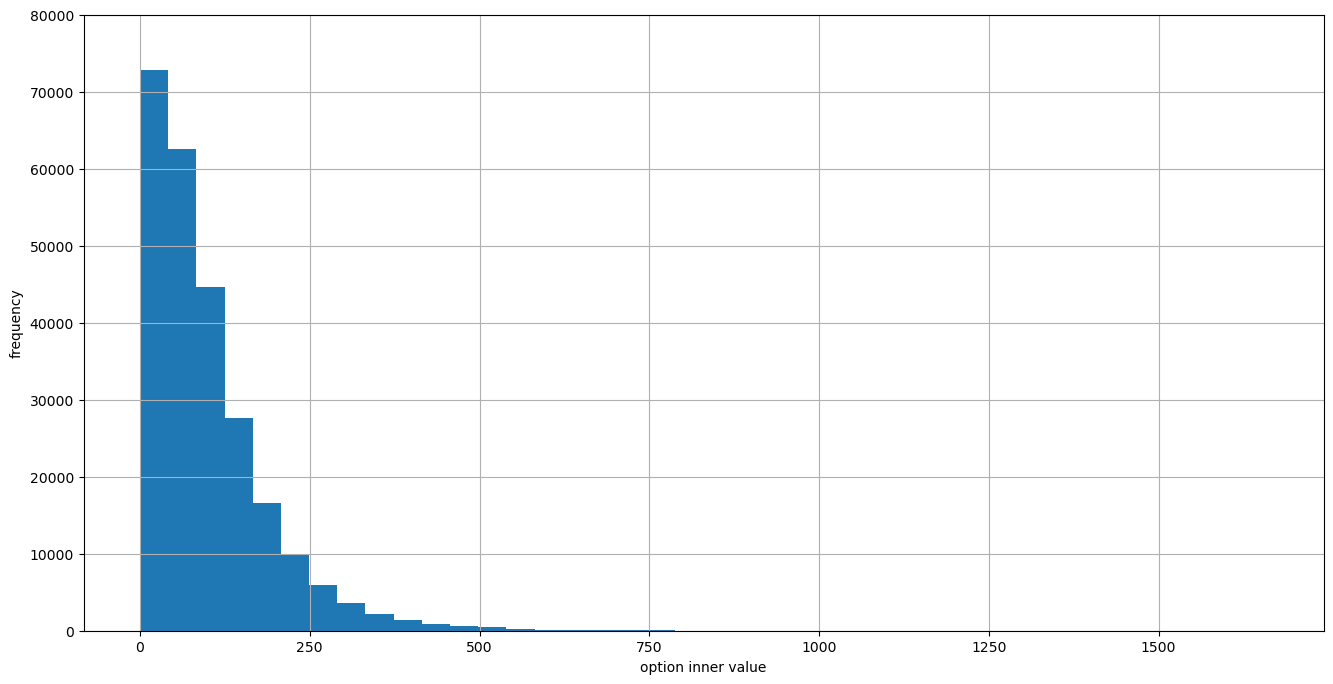

In [120]:
import numpy as np
plt.rcParams["figure.figsize"] = (16,8)
plt.hist(np.maximum(S[-1] - K, 0), bins=40)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 80000)

# Other example

# we want to find integral value of a function

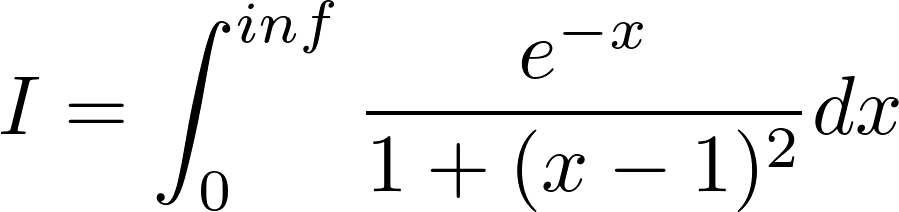

In [121]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

In [122]:
# function to generate random number

def get_rand_number(min_value, max_value):
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [123]:
# integrand function f(x)

def f_of_x(x):
    return (e**(-1*x))/(1+(x-1)**2)

In [124]:
def crude_monte_carlo(num_samples=5000):
    lower_bound = 0
    upper_bound = 5
    # taking this range as f is between 0 and pi
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

When run 10000 times, we get int as approx 0.699 while actual is 0.696 which is close by.

To know that we are confident on our answer, we calculate the varience and error so that it being minimum, we can gaurantee the workign of our model.

In [125]:
# variance is avg of sq dist from mean
# error is sqrt of var / no of samples

def get_crude_MC_variance(num_samples):
    int_max = 5
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples  # avg of sq
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2   # sq of avg
    
    return sum_of_sqs - sq_ave

In [126]:
MC_samples = 10000
var_samples = 10000 # number of samples we will use to calculate the variance
crude_estimation = crude_monte_carlo(MC_samples)
variance = get_crude_MC_variance(var_samples)
error = math.sqrt(variance/MC_samples)

# display results
print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")

Monte Carlo Approximation of f(x): 0.7034001504567642
Variance of Approximation: 0.27540645165198296
Error in Approximation: 0.005247918174400045


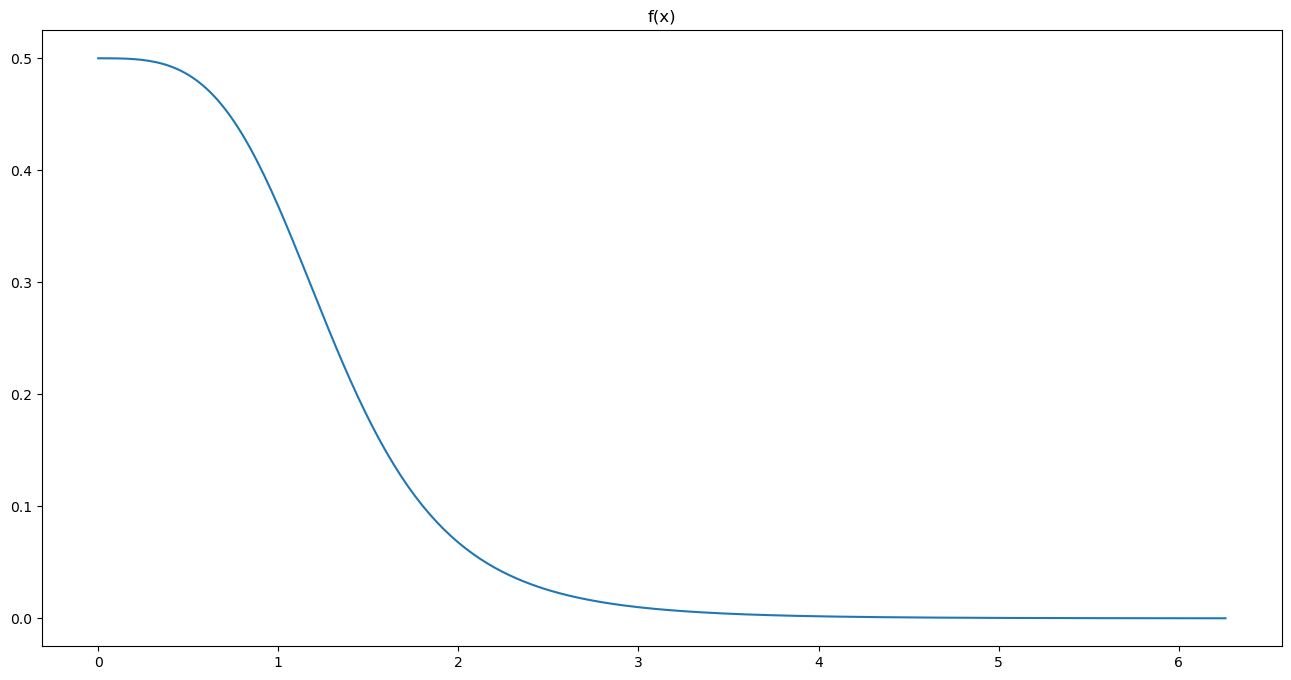

In [127]:
# visualising our code
# graph of function f(x)

xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

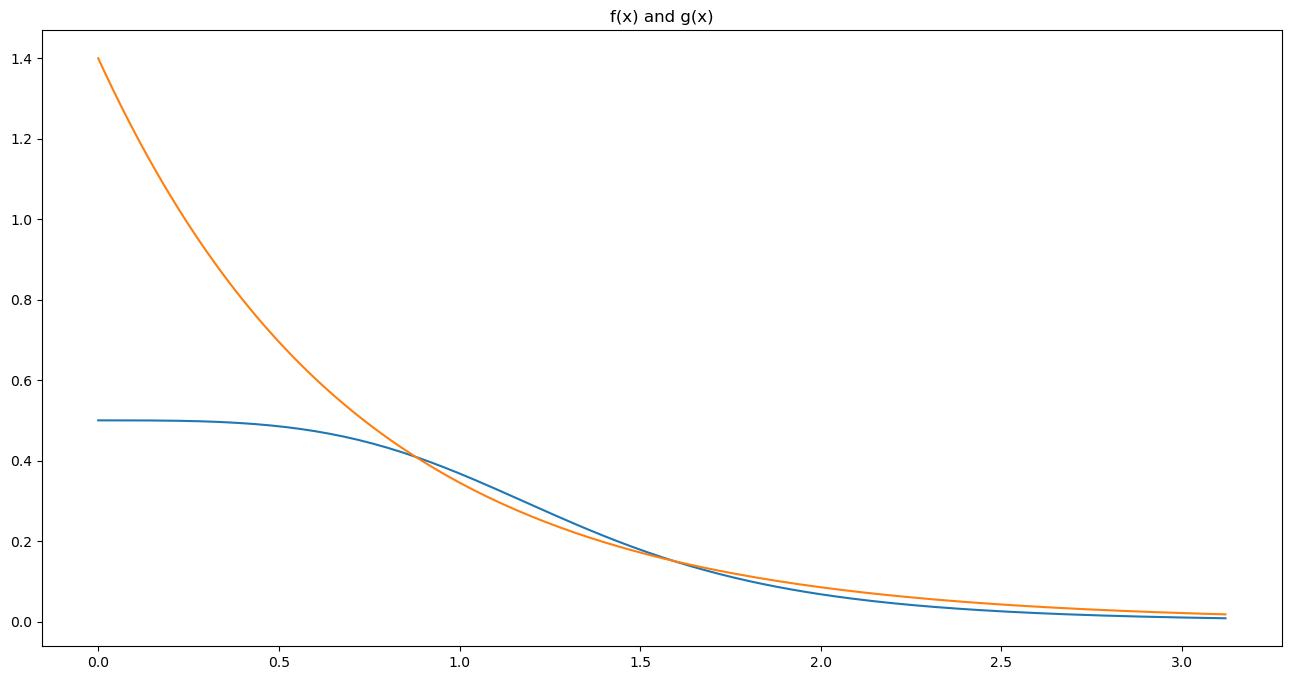

In [128]:
xs = [float(i/50) for i in range(int(50*PI))]
fs = [f_of_x(x) for x in xs]
gs = [g_of_x(x, A=1.4, lamda=1.4) for x in xs]
plt.plot(xs, fs)
plt.plot(xs, gs)
plt.title("f(x) and g(x)");

We take different values of lamda and calculate variance. Lowest variance for particular value of lamda is optimal lamda

In [129]:
# g(x) is of type A*e^lamda x
# we find that ideally A is lamda

def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave


In [130]:
test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6500000000000001
Optimal Variance: 0.046585621340034855
Error: 0.0021583702495177894


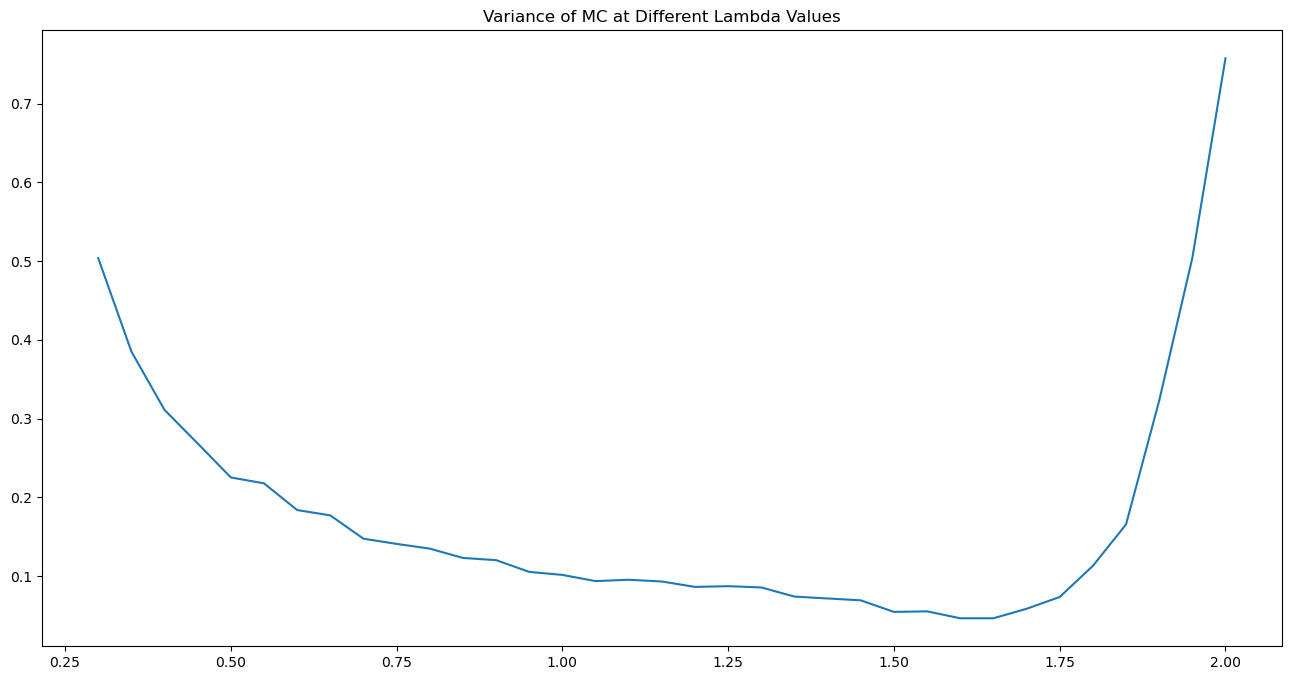

In [131]:
plt.plot(test_lamdas[5:40], variances[5:40])
plt.title("Variance of MC at Different Lambda Values");

In [132]:
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

In [133]:
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.6882808629850863
Variance: 0.05103850291752288
Error: 0.0022591702662155167
